In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
file_path = "IEA-EV-dataEV salesHistoricalCars.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.info())


      region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
1  Australia  Historical  EV stock share  Cars         EV  2011   percent   
2  Australia  Historical  EV sales share  Cars         EV  2011   percent   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   

       value  
0   49.00000  
1    0.00039  
2    0.00650  
3   49.00000  
4  220.00000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      3798 non-null   object 
 1   category    3798 non-null   object 
 2   parameter   3798 non-null   object 
 3   mode        3798 non-null   object 
 4   powertrain  3798 non-null   object 
 5   year        3798 non-null   int64  
 6   unit    

In [5]:
df_sales = df[(df['parameter'] == 'EV sales') & (df['mode'] == 'Cars') & (df['unit'] == 'Vehicles')]
yearly_sales = df_sales.groupby('year')['value'].sum().reset_index().sort_values(by='year')


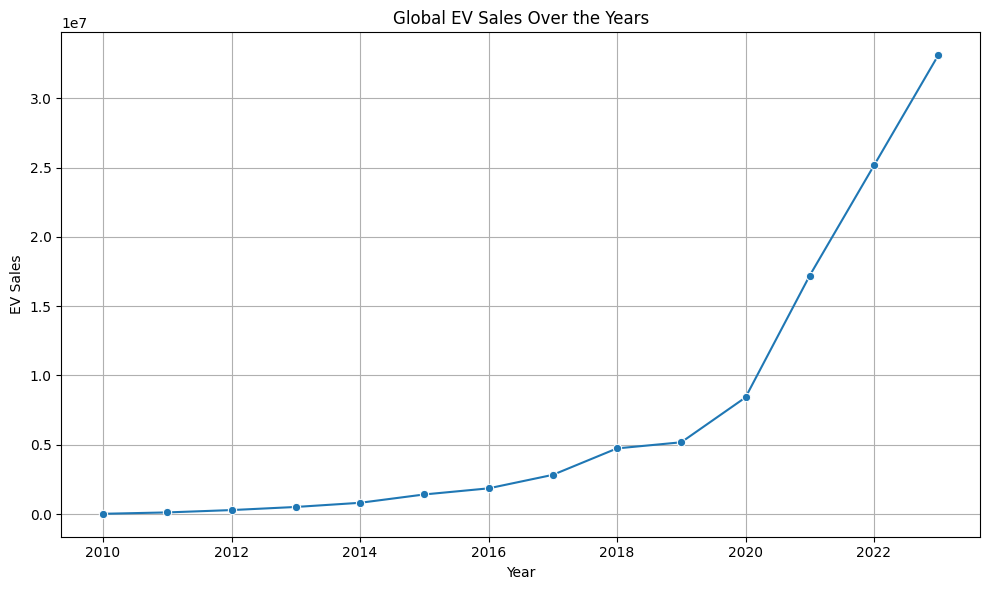

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales, x='year', y='value', marker='o')
plt.title('Global EV Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
X = yearly_sales[['year']]
y = yearly_sales['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 47091863470882.32
R-squared: 0.09232868147628659


In [9]:
future_years = pd.DataFrame({'year': list(range(2025, 2031))})
future_sales = model.predict(future_years)

predictions_df = future_years.copy()
predictions_df['predicted_sales'] = future_sales.astype(int)
print(predictions_df)


   year  predicted_sales
0  2025         27995113
1  2026         30428467
2  2027         32861821
3  2028         35295175
4  2029         37728529
5  2030         40161883


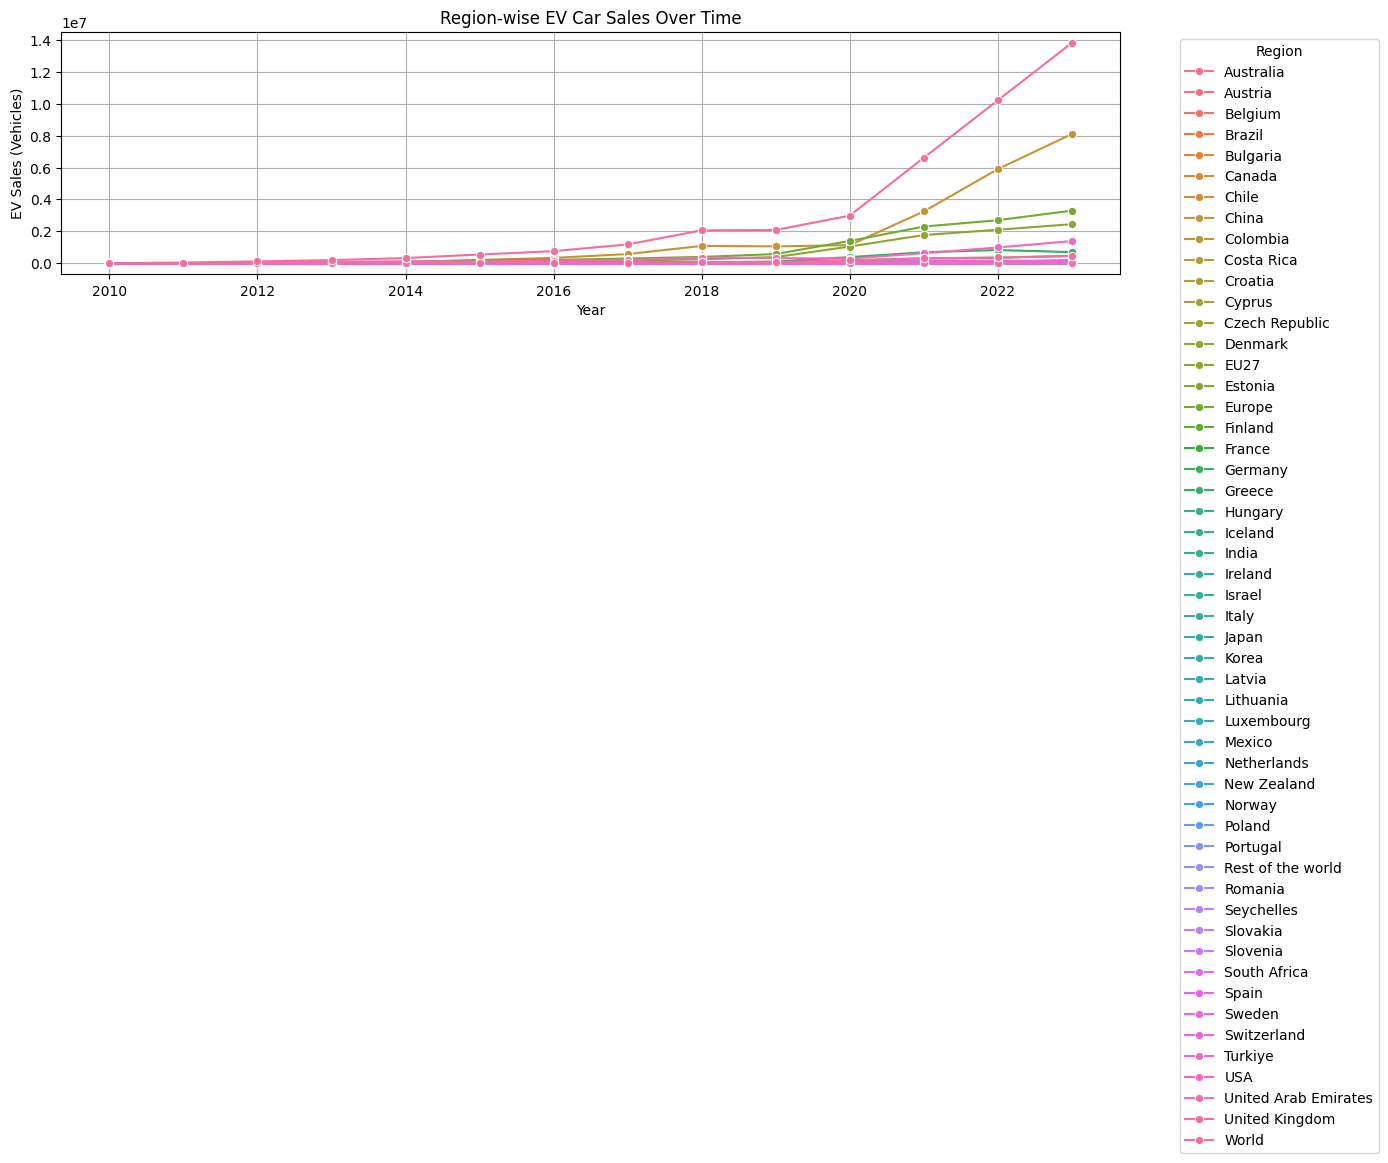

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for EV car sales data
sales_df = df[
    (df['parameter'] == 'EV sales') &
    (df['mode'] == 'Cars') &
    (df['unit'] == 'Vehicles')
]

# Group by region and year
region_sales = sales_df.groupby(['region', 'year'])['value'].sum().reset_index()

# Plot region-wise EV sales trends
plt.figure(figsize=(14, 8))
sns.lineplot(data=region_sales, x='year', y='value', hue='region', marker='o')
plt.title('Region-wise EV Car Sales Over Time')
plt.xlabel('Year')
plt.ylabel('EV Sales (Vehicles)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


## 📌 Conclusion: Region-wise EV Car Sales Analysis

1. **EV car sales** have shown a steady increase across all regions since 2011.
2. **Top regions** include China, Europe, and the United States.
3. **Developing regions** show slower but positive adoption trends.
4. **Government incentives** significantly boost EV sales growth.
5. The dataset covers **region-level data**, not individual states.
6. For state-wise forecasting, a **more granular dataset** is required.
